In [1]:
import time
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
from structure import *
from dnn_app_utils_v3 import load_data
%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

In [2]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_data()

y = 0. It's a non-cat picture.


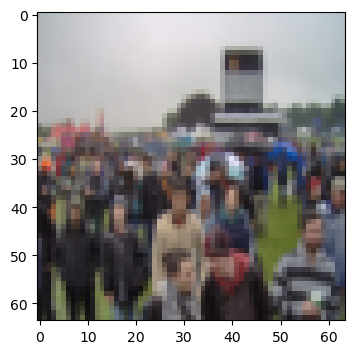

In [3]:
index = 100
plt.imshow(train_x_orig[index])
print ("y = " + str(train_y[0,index]) + ". It's a " + classes[train_y[0,index]].decode("utf-8") +  " picture.")

In [4]:
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x_orig shape: " + str(train_x_orig.shape))
print ("train_y shape: " + str(train_y.shape))
print ("test_x_orig shape: " + str(test_x_orig.shape))
print ("test_y shape: " + str(test_y.shape))

Number of training examples: 209
Number of testing examples: 50
Each image is of size: (64, 64, 3)
train_x_orig shape: (209, 64, 64, 3)
train_y shape: (1, 209)
test_x_orig shape: (50, 64, 64, 3)
test_y shape: (1, 50)


In [5]:
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))

train_x's shape: (12288, 209)
test_x's shape: (12288, 50)


In [6]:
n_x = 12288     # num_px * num_px * 3
n_h = 3
n_y = 1
layers_dims = (n_x, n_h, n_y)
learning_rate = 0.0075

In [7]:
def model(X, Y, layer_dims, learning_rate=0.0075, num_iterations=3000, lambd=0.7):
    np.random.seed(1)
    costs = []
    parameters = initialize_parameters_deep(layer_dims)
    
    for i in range(num_iterations):
        AL, caches = L_model_forward(X, parameters)
        cost = compute_cost(AL, Y, parameters, lambd)
        grads = L_model_backward(AL, Y, caches, lambd)
        parameters = update_parameters(parameters, grads, learning_rate)
        
        if i % 100 == 0:
            print("Cost after iteration {}: {}".format(i, cost))
        if i % 100 == 0:
            costs.append(cost)
    
    return parameters, costs

In [8]:
parameters, costs = model(train_x, train_y, layers_dims)

train_predictions = predict(train_x, parameters)
train_accuracy = accuracy(train_predictions, train_y)
print("Training accuracy: {:.2f}%".format(train_accuracy * 100))

test_predictions = predict(test_x, parameters)
test_accuracy = accuracy(test_predictions, test_y)
print("Test accuracy: {:.2f}%".format(test_accuracy * 100))


Shape of parameters W1:  (3, 12288)
Shape of parameters b1:  (3, 1)
Shape of parameters W2:  (1, 3)
Shape of parameters b2:  (1, 1)
Shape Z:  (3, 209)
Shape Z:  (1, 209)
Shape of A_previous:  (3, 209)
Shape of A_previous:  (12288, 209)
Cost after iteration 0: 0.6999544426112346
Shape Z:  (3, 209)
Shape Z:  (1, 209)
Shape of A_previous:  (3, 209)
Shape of A_previous:  (12288, 209)
Shape Z:  (3, 209)
Shape Z:  (1, 209)
Shape of A_previous:  (3, 209)
Shape of A_previous:  (12288, 209)
Shape Z:  (3, 209)
Shape Z:  (1, 209)
Shape of A_previous:  (3, 209)
Shape of A_previous:  (12288, 209)
Shape Z:  (3, 209)
Shape Z:  (1, 209)
Shape of A_previous:  (3, 209)
Shape of A_previous:  (12288, 209)
Shape Z:  (3, 209)
Shape Z:  (1, 209)
Shape of A_previous:  (3, 209)
Shape of A_previous:  (12288, 209)
Shape Z:  (3, 209)
Shape Z:  (1, 209)
Shape of A_previous:  (3, 209)
Shape of A_previous:  (12288, 209)
Shape Z:  (3, 209)
Shape Z:  (1, 209)
Shape of A_previous:  (3, 209)
Shape of A_previous:  (12288